In [122]:
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [123]:
g = nx.Graph([(1,4), (4,5), (4,2), (4,6), (2,3), (3,5), (6,7), (7,5), (5,8), (8,9), (9, 10), (8, 10), (10, 11), (11,12)])

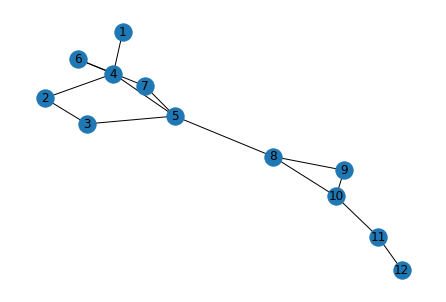

In [124]:
nx.draw(g, with_labels = True)
plt.show()

In [125]:
cycles_g = nx.cycle_basis(g)

In [126]:
cycles_g

[[5, 7, 6, 4], [5, 3, 2, 4], [9, 10, 8]]

In [127]:
induceds = [ nx.induced_subgraph(g, induced) for induced in cycles_g ]
induceds

[(4, 5), (4, 6), (5, 7), (6, 7)]


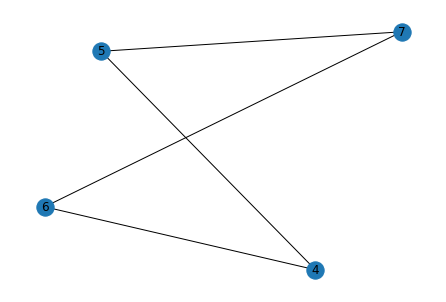

[(2, 4), (2, 3), (3, 5), (4, 5)]


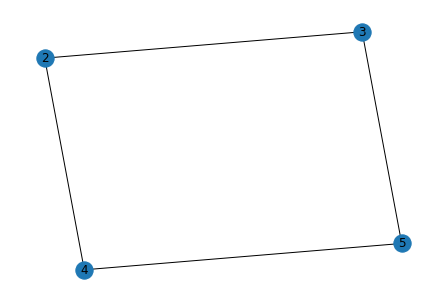

[(8, 9), (8, 10), (9, 10)]


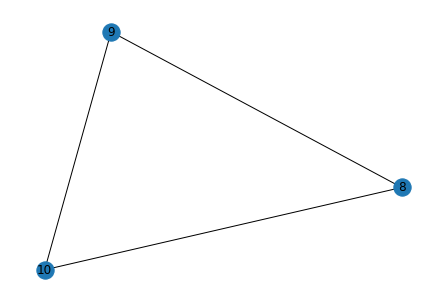

In [128]:
induced_edges = list()
for induced in induceds:
    induced_edges += list(induced.edges())
    print(induced.edges())
    nx.draw(induced, with_labels = True)
    plt.show()

In [129]:
copy_g = copy.deepcopy(g)
copy_g.edges()

EdgeView([(1, 4), (4, 5), (4, 2), (4, 6), (5, 3), (5, 7), (5, 8), (2, 3), (6, 7), (8, 9), (8, 10), (9, 10), (10, 11), (11, 12)])

In [130]:
print(g.edges())
print(induced_edges)

[(1, 4), (4, 5), (4, 2), (4, 6), (5, 3), (5, 7), (5, 8), (2, 3), (6, 7), (8, 9), (8, 10), (9, 10), (10, 11), (11, 12)]
[(4, 5), (4, 6), (5, 7), (6, 7), (2, 4), (2, 3), (3, 5), (4, 5), (8, 9), (8, 10), (9, 10)]


In [131]:
copy_g.remove_edges_from(induced_edges)
copy_g.remove_nodes_from(list(nx.isolates(copy_g)))

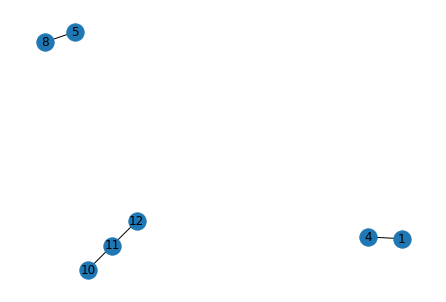

In [132]:
nx.draw(copy_g, with_labels = True)

In [133]:
g.remove_edges_from(copy_g.edges())
g.remove_nodes_from( list(nx.isolates(g)) )

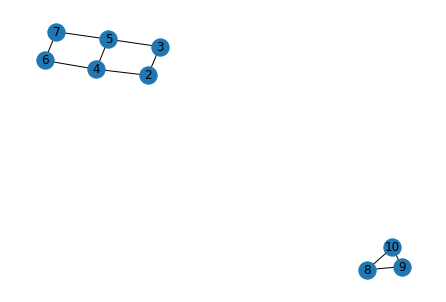

In [134]:
nx.draw(g, with_labels = True)

In [135]:
graphs = [g.subgraph(c).copy() for c in nx.connected_components(g)] + [copy_g.subgraph(c).copy() for c in nx.connected_components(copy_g)]
graphs

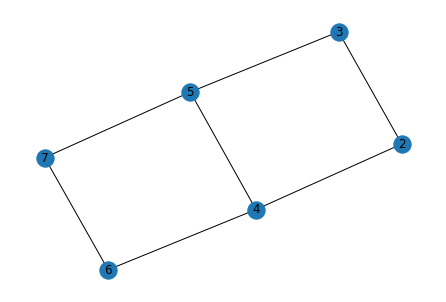

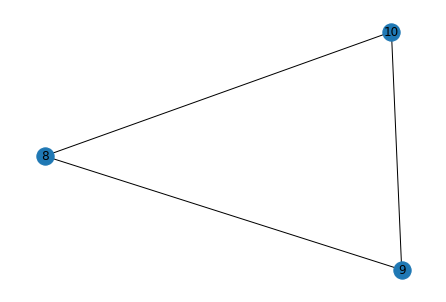

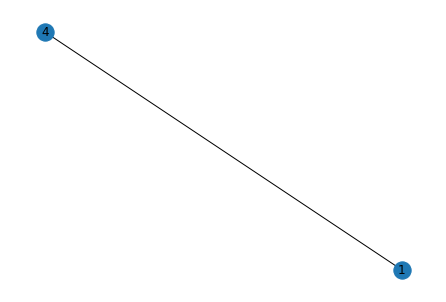

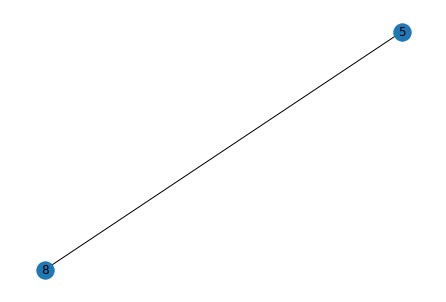

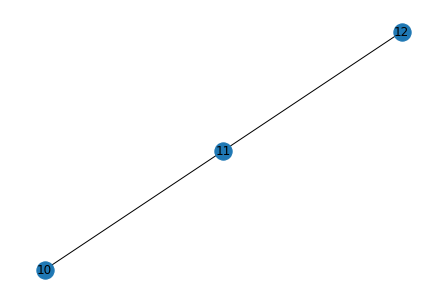

In [136]:
for graph in graphs:
    nx.draw(graph, with_labels = True)
    plt.show()

In [153]:
def prune_graph(g):
    """
    Extract the tree parts of the given network.
    :param g: networkx graph.
    :return: <dict> {'trees': induced tree sub-graphs, 'cycles': induced cycle sub-graphs}.
    """
    g_copy = copy.deepcopy(g)
    g_copy = nx.Graph(g_copy) # Turns the graph into simple undirected graph

    # Get the cycle basis of the given graph
    cycle_basis = nx.cycle_basis(g_copy)

    # Turns each cycle into a networkx graph
    induced_edges = list()
    for induced in cycle_basis:
        induced_edges += list(nx.induced_subgraph(g, induced).edges())

    # Remove all cycles from the graph copy
    g_cycles = copy.deepcopy(g)
    for edge in induced_edges:
        g_cycles.remove_edges_from([edge] * g.number_of_edges(edge[0], edge[1]))
    g_cycles.remove_nodes_from(list(nx.isolates(g_cycles)))

    # Remove all the tree parts from the original graph
    g.remove_edges_from(g_cycles.edges())
    g.remove_nodes_from(list(nx.isolates(g)))

    # Return a list of trees and cycles (that forms the given graph)
    return {'trees': [g_cycles.subgraph(c).copy() for c in nx.connected_components(g_cycles)],
            'cycles': [g.subgraph(c).copy() for c in nx.connected_components(g)]}

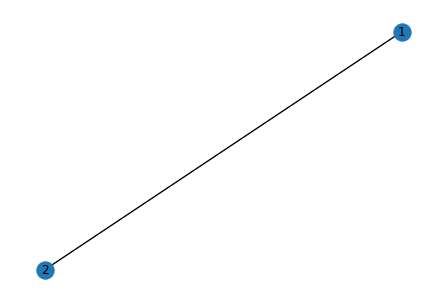

MultiGraph with 2 nodes and 2 edges


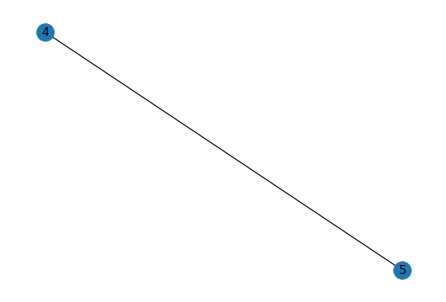

MultiGraph with 2 nodes and 1 edges


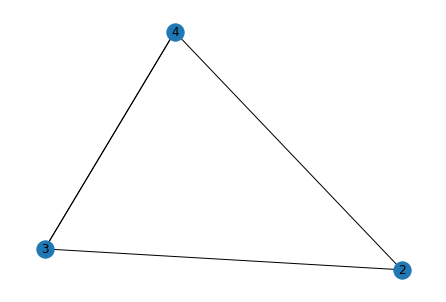

MultiGraph with 3 nodes and 4 edges


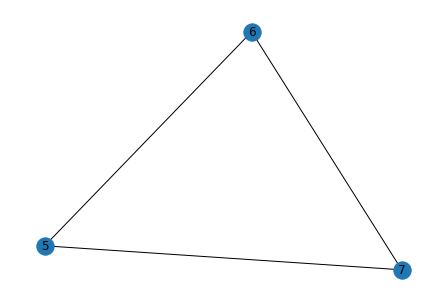

MultiGraph with 3 nodes and 3 edges


In [154]:
gs = nx.MultiGraph([(1,2), (1,2), (2,3), (2,4), (3,4), (3,4),(4,5),(5,6),(5,7),(6,7)])
subgraphs = prune_graph(gs)
g_lst = subgraphs['trees'] + subgraphs['cycles']
for graph in g_lst:
    nx.draw(graph, with_labels = True)
    plt.show()
    print(graph)

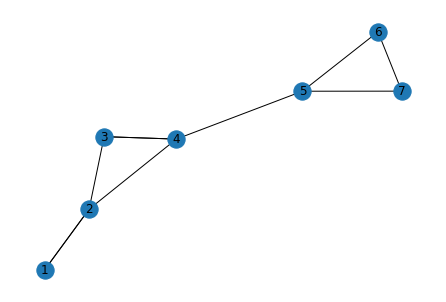

MultiGraph with 7 nodes and 10 edges


In [139]:
gs = nx.MultiGraph([(1,2), (1,2), (2,3), (2,4), (3,4), (3,4),(4,5),(5,6),(5,7),(6,7)])
g_copy = copy.deepcopy(gs)
g_copy = nx.Graph(g_copy) # Turns the graph into simple undirected graph
nx.draw(gs, with_labels = True)
plt.show()
print(gs)

In [140]:
# Get the cycle basis of the given graph
cycle_basis = nx.cycle_basis(g_copy)
cycle_basis

[[3, 4, 2], [6, 7, 5]]

In [141]:
induced_edges = list()
for induced in cycle_basis:
    print(induced)
    induced_edges += list(nx.induced_subgraph(gs, induced).edges())
induced_edges

[3, 4, 2]
[6, 7, 5]


[(2, 3), (2, 4), (3, 4), (3, 4), (5, 6), (5, 7), (6, 7)]

In [142]:
g_cycles = copy.deepcopy(gs)

In [143]:
for edge in induced_edges:
    g_cycles.remove_edges_from([edge]*gs.number_of_edges(edge[0],edge[1]))
g_cycles.remove_nodes_from(list(nx.isolates(g_cycles)))

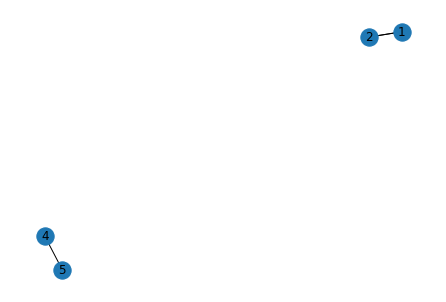

MultiGraph with 4 nodes and 3 edges


In [144]:
nx.draw(g_cycles, with_labels = True)
plt.show()
print(g_cycles)

In [145]:
g_cycles.edges()

MultiEdgeDataView([(1, 2), (1, 2), (4, 5)])

In [146]:
gs.remove_edges_from(g_cycles.edges())
gs.remove_nodes_from(list(nx.isolates(gs)))

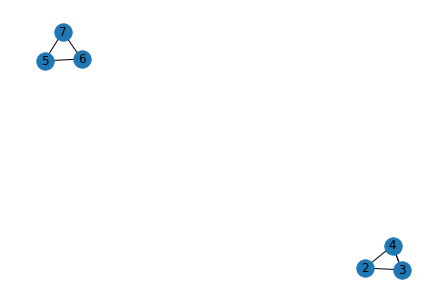

MultiGraph with 6 nodes and 7 edges


In [147]:
nx.draw(gs, with_labels = True)
plt.show()
print(gs)